In [1]:
import math
%load_ext autoreload
%autoreload 2

import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from astropy.timeseries import LombScargle
import pandas as pd
pd.set_option('precision', 0)
pd.set_option('display.float_format', lambda x: '%.16f' % x)

In [2]:
# Make the notebook use the whole screen width
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# 1. Read the first time series - sim_pulse.lc

In [25]:
df = pd.read_csv("../data/sim_pulse.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
df.dtypes

Time    float64
Lc      float64
dtype: object

In [26]:
X, Y = df['Time'].tolist(), df['Lc'].tolist()
X, Y = np.array(X), np.array(Y)

Plot the data

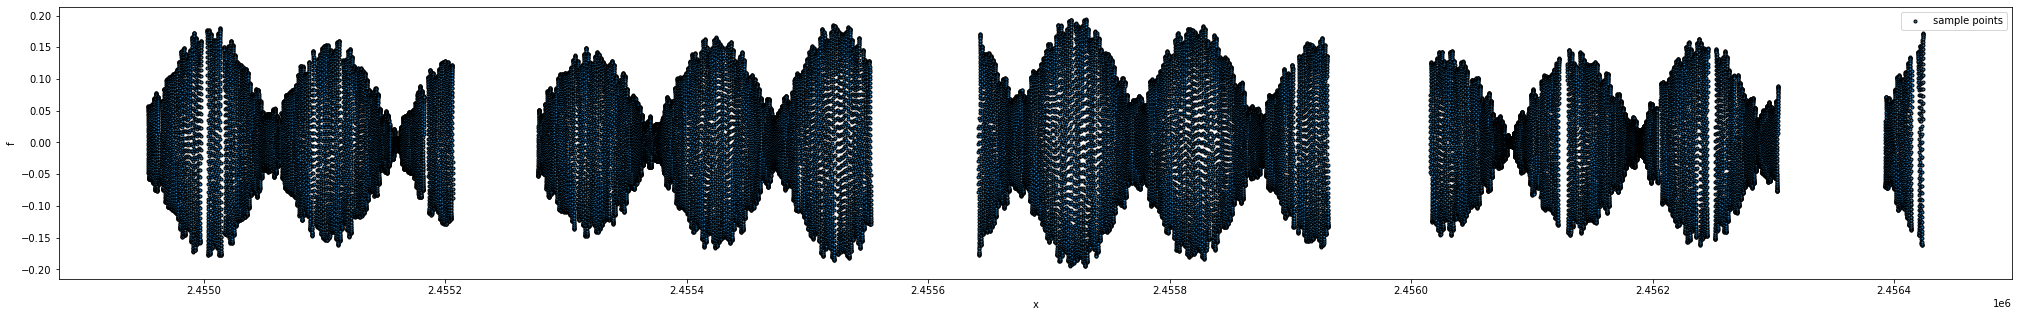

In [27]:
# Setup our figure environment
plt.figure(figsize=(35, 5))

# Plot observations
plt.plot(X, Y, ".", mew=1, linewidth=1, mec="black")

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

(Text(0.5, 0, 'frequency'), Text(0, 0.5, 'power'))

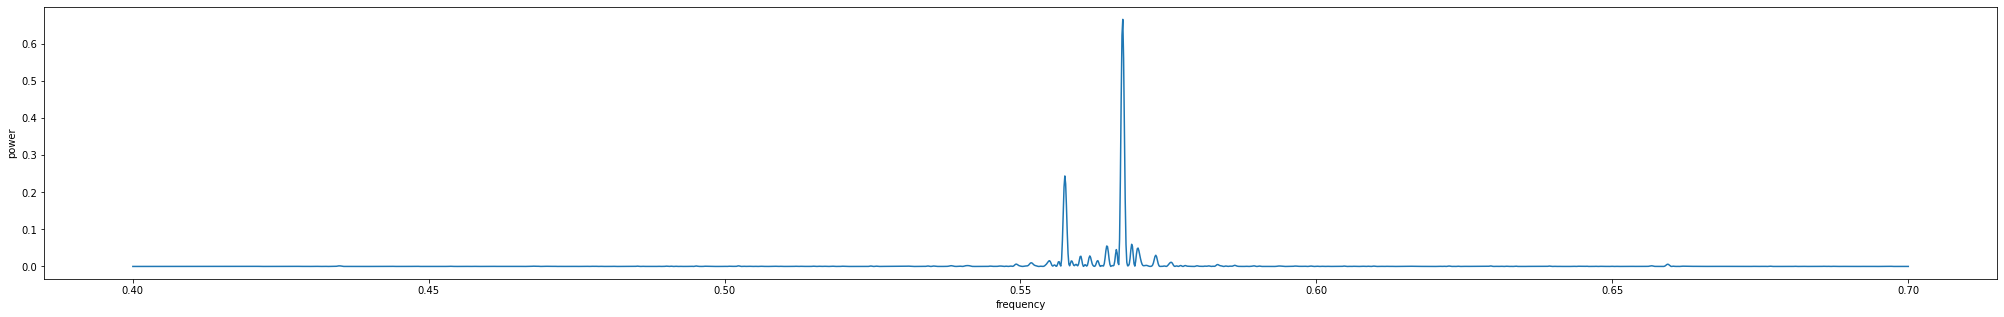

In [29]:
frequency, power = LombScargle(X, Y).autopower(minimum_frequency=0.4, maximum_frequency=0.7)
plt.figure(figsize=(35, 5))
plt.plot(frequency, power)
plt.xlabel("frequency"), plt.ylabel("power")

In [7]:
frequency[np.argsort(power)[::-1][:100]]

array([0.56720233, 0.56733834, 0.56706631, 0.56747435, 0.5669303 ,
       0.56761036, 0.5575455 , 0.55740949, 0.55768151, 0.55727348,
       0.55781752, 0.56774637, 0.56679429, 0.55713747, 0.55795353,
       0.56883447, 0.5646181 , 0.56869845, 0.56475412, 0.56978655,
       0.56992256, 0.56448209, 0.56897048, 0.56625024, 0.56965053,
       0.57005857, 0.56611423, 0.56788238, 0.56489013, 0.55700145,
       0.57291481, 0.56434608, 0.5727788 , 0.57019458, 0.56856244,
       0.56638626, 0.56012972, 0.56176186, 0.56162585, 0.56026573,
       0.57305083, 0.55808955, 0.56189787, 0.56910649, 0.57264279,
       0.56951452, 0.55999371, 0.56597822, 0.57033059, 0.56665828,
       0.56148984, 0.55863359, 0.56298597, 0.55482527, 0.55496128,
       0.56312198, 0.56502614, 0.56040174, 0.57318684, 0.55645741,
       0.55468926, 0.5587696 , 0.56203388, 0.57250678, 0.56421007,
       0.55509729, 0.55849758, 0.57549903, 0.57536302, 0.55659342,
       0.56284995, 0.55183301, 0.5704666 , 0.55455324, 0.56842

# 2. Read the second time series - sim_eb.lc

In [20]:
df = pd.read_csv("../data/sim_eb.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
df.dtypes

Time    float64
Lc      float64
dtype: object

In [21]:
X, Y = df['Time'].tolist(), df['Lc'].tolist()
X, Y = np.array(X), np.array(Y)

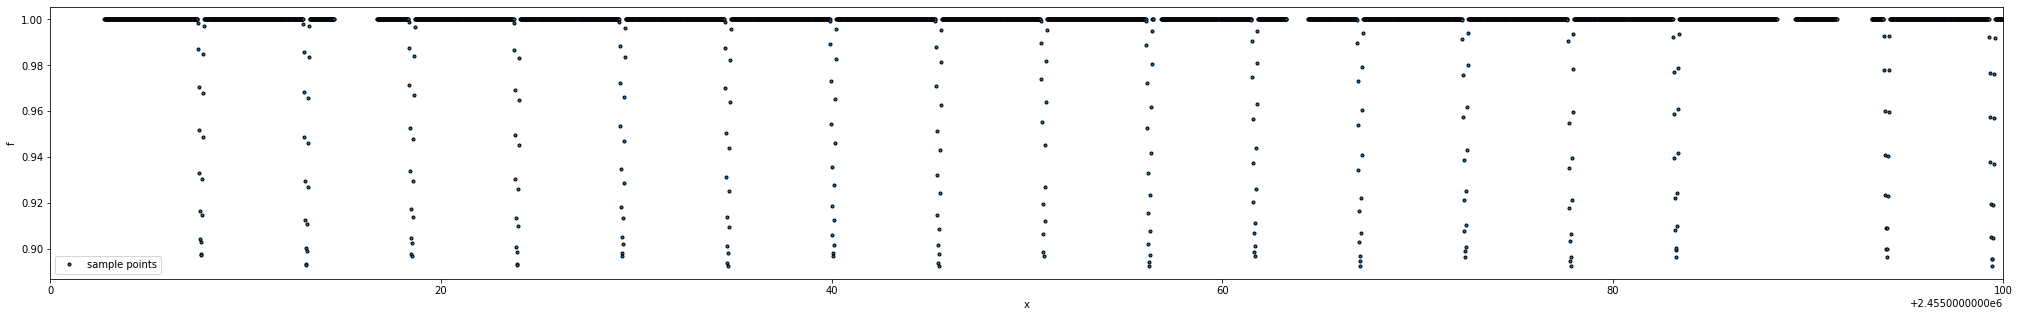

In [22]:
# Setup our figure environment
plt.figure(figsize=(35, 5))

# Plot observations
plt.plot(X, Y, ".", mew=1, linewidth=1, mec="black")
plt.xlim(2.4550e6, 2.4551e6)

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

(Text(0.5, 0, 'frequency'), Text(0, 0.5, 'power'))

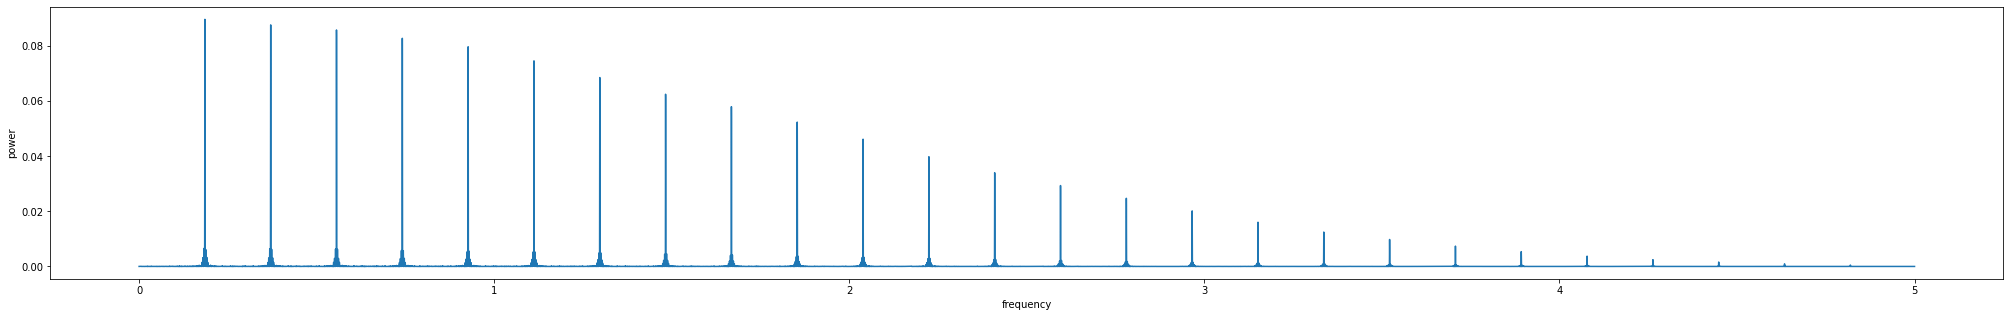

In [23]:
frequency, power = LombScargle(X, Y).autopower(minimum_frequency=0.0, maximum_frequency=5)
plt.figure(figsize=(35, 5))
plt.plot(frequency, power)
plt.xlabel("frequency"), plt.ylabel("power")

In [24]:
frequency[np.argsort(power)[::-1][:100]]

array([0.        , 0.18538385, 0.3707677 , 0.55601554, 0.37063169,
       0.55615155, 0.18524784, 0.74139939, 0.92678324, 0.7415354 ,
       0.18551986, 1.11216708, 0.92691925, 0.92664722, 0.37090371,
       1.11203107, 0.74126337, 1.29755093, 0.55587952, 1.29741492,
       0.37049568, 0.55628756, 1.48279877, 1.1123031 , 1.48293478,
       0.18511183, 1.66818262, 0.74167141, 1.29768695, 1.66831863,
       1.85356647, 1.29727891, 1.48266276, 1.11189506, 1.66804661,
       0.92705526, 0.18565587, 1.85370248, 2.03895032, 0.92651121,
       1.48307079, 1.85343046, 0.74112736, 2.03881431, 0.37103972,
       2.22433417, 0.55574351, 1.11243911, 2.03908633, 2.22419816,
       1.66845464, 0.37035966, 2.40958201, 0.55642357, 2.40971802,
       1.29782296, 2.22447018, 1.85383849, 1.85329445, 1.6679106 ,
       2.0386783 , 2.59496586, 0.18497581, 2.22406215, 1.48252675,
       2.59510187, 0.74180742, 2.409446  , 1.2971429 , 2.40985403,
       1.48320681, 2.78034971, 2.03922234, 2.59482984, 1.11175

# 3. Read the third time series - sim_noisy_pulse_eb.lc

In [30]:
df = pd.read_csv("../data/sim_noisy_pulse_eb.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
X, Y = df['Time'].tolist(), df['Lc'].tolist()
X, Y = np.array(X), np.array(Y)

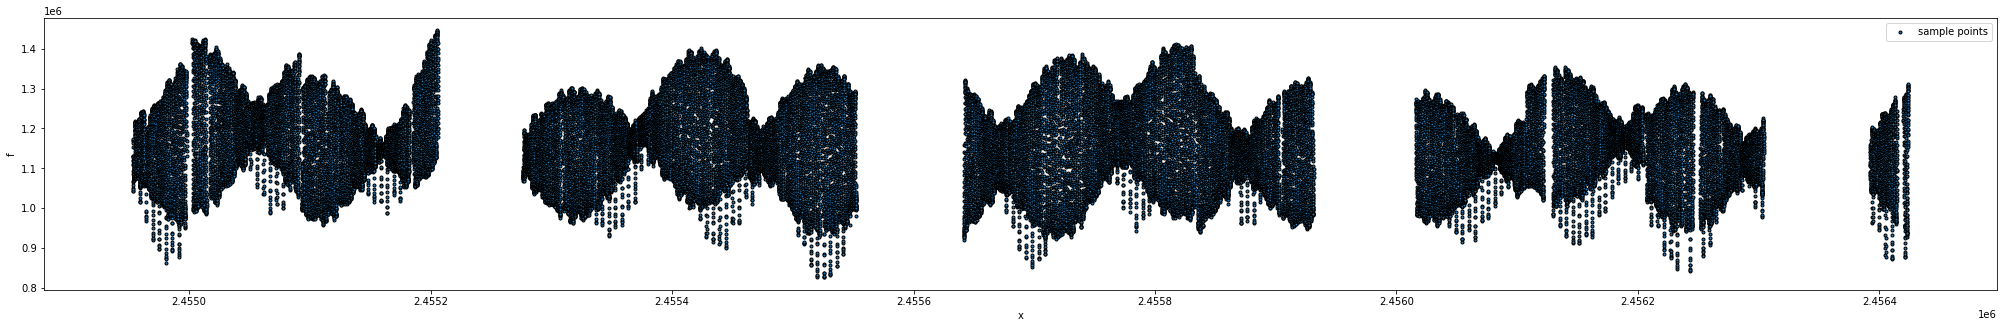

In [31]:
# Setup our figure environment
plt.figure(figsize=(35, 5))

# Plot observations
plt.plot(X, Y, ".", mew=1, linewidth=1, mec="black")

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

(Text(0.5, 0, 'frequency'), Text(0, 0.5, 'power'))

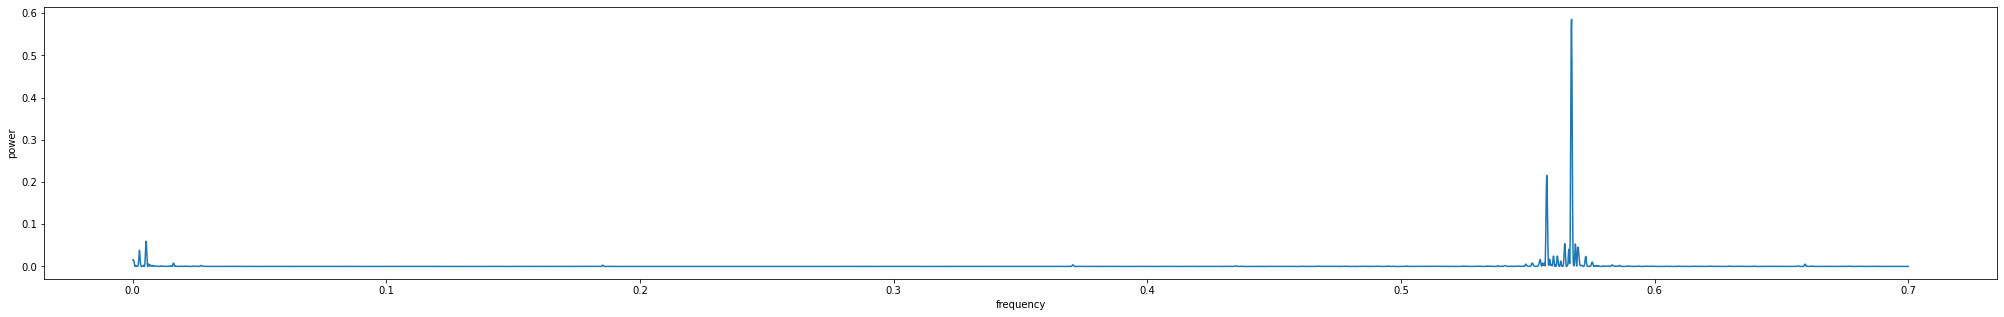

In [33]:
frequency, power = LombScargle(X, Y).autopower(minimum_frequency=0.0, maximum_frequency=0.7)
plt.figure(figsize=(35, 5))
plt.plot(frequency, power)
plt.xlabel("frequency"), plt.ylabel("power")